# Chess-Bot
An implementation of DeepChess (paper in `docs/deepchess.pdf`) and its use in a chess engine
### Differences from the original DeepChess:
- Training of the Autoencoder uses BinaryCrossentropy as its loss function. It's unclear what is used in the paper, but I suspect MSE
- LeakyReLU instead of ReLU?

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

import chessbot as cb

## Environment
Downloads, unpacks, processes, and splits training data  
Should this break, go to http://ccrl.chessdom.com/ccrl/4040/games.html and replace the variable in `chessbot/environment.py` with the updated no-comments game link

In [2]:
cb.environment.create()

Dataset archive file found at /home/wumphlett/personal/Chess-Bot/data/CCRL-4040.[1505357].pgn.7z
Dataset file found at /home/wumphlett/personal/Chess-Bot/data/CCRL-4040.[1505357].pgn
Dataset pkl files found at /home/wumphlett/personal/Chess-Bot/data
Dataset val pkl files found at /home/wumphlett/personal/Chess-Bot/data
Done


## Pos2Vec
The Pos2Vec dataset consists of 1mil positions each from white won and black won games  
Pos2Vec is trained using a greedy layer-by-layer strategy of an unsupervised autoencoder

In [3]:
train, val = cb.dataset.pos2vec_dataset()

In [4]:
pos2vec = cb.model.train_pos2vec(train, val)

Training layer 1/4
Epoch 1/100
40000/40000 [==============================] - 79s 2ms/step - loss: 0.1052 - binary_accuracy: 0.9001 - val_loss: 0.0276 - val_binary_accuracy: 0.9720 - lr: 0.0050
Epoch 2/100
40000/40000 [==============================] - 81s 2ms/step - loss: 0.0258 - binary_accuracy: 0.9724 - val_loss: 0.0249 - val_binary_accuracy: 0.9727 - lr: 0.0049
Epoch 3/100
40000/40000 [==============================] - 78s 2ms/step - loss: 0.0245 - binary_accuracy: 0.9731 - val_loss: 0.0242 - val_binary_accuracy: 0.9734 - lr: 0.0048
Epoch 4/100
40000/40000 [==============================] - 77s 2ms/step - loss: 0.0240 - binary_accuracy: 0.9738 - val_loss: 0.0238 - val_binary_accuracy: 0.9740 - lr: 0.0047
Epoch 5/100
40000/40000 [==============================] - 79s 2ms/step - loss: 0.0236 - binary_accuracy: 0.9743 - val_loss: 0.0234 - val_binary_accuracy: 0.9745 - lr: 0.0046
Epoch 6/100
40000/40000 [==============================] - 77s 2ms/step - loss: 0.0232 - binary_accuracy: 

40000/40000 [==============================] - 79s 2ms/step - loss: 0.0171 - binary_accuracy: 0.9812 - val_loss: 0.0171 - val_binary_accuracy: 0.9812 - lr: 0.0020
Epoch 48/100
40000/40000 [==============================] - 81s 2ms/step - loss: 0.0170 - binary_accuracy: 0.9813 - val_loss: 0.0170 - val_binary_accuracy: 0.9814 - lr: 0.0019
Epoch 49/100
40000/40000 [==============================] - 78s 2ms/step - loss: 0.0170 - binary_accuracy: 0.9815 - val_loss: 0.0169 - val_binary_accuracy: 0.9815 - lr: 0.0019
Epoch 50/100
40000/40000 [==============================] - 79s 2ms/step - loss: 0.0169 - binary_accuracy: 0.9816 - val_loss: 0.0169 - val_binary_accuracy: 0.9816 - lr: 0.0019
Epoch 51/100
40000/40000 [==============================] - 79s 2ms/step - loss: 0.0168 - binary_accuracy: 0.9817 - val_loss: 0.0168 - val_binary_accuracy: 0.9816 - lr: 0.0018
Epoch 52/100
40000/40000 [==============================] - 78s 2ms/step - loss: 0.0168 - binary_accuracy: 0.9818 - val_loss: 0.0167 

40000/40000 [==============================] - 85s 2ms/step - loss: 0.0151 - binary_accuracy: 0.9837 - val_loss: 0.0151 - val_binary_accuracy: 0.9837 - lr: 7.7942e-04
Epoch 94/100
40000/40000 [==============================] - 80s 2ms/step - loss: 0.0150 - binary_accuracy: 0.9837 - val_loss: 0.0150 - val_binary_accuracy: 0.9837 - lr: 7.6383e-04
Epoch 95/100
40000/40000 [==============================] - 78s 2ms/step - loss: 0.0150 - binary_accuracy: 0.9837 - val_loss: 0.0150 - val_binary_accuracy: 0.9837 - lr: 7.4855e-04
Epoch 96/100
40000/40000 [==============================] - 78s 2ms/step - loss: 0.0150 - binary_accuracy: 0.9838 - val_loss: 0.0150 - val_binary_accuracy: 0.9838 - lr: 7.3358e-04
Epoch 97/100
40000/40000 [==============================] - 78s 2ms/step - loss: 0.0150 - binary_accuracy: 0.9838 - val_loss: 0.0149 - val_binary_accuracy: 0.9838 - lr: 7.1891e-04
Epoch 98/100
40000/40000 [==============================] - 78s 2ms/step - loss: 0.0149 - binary_accuracy: 0.9838

40000/40000 [==============================] - 81s 2ms/step - loss: 0.0147 - binary_accuracy: 0.9837 - val_loss: 0.0147 - val_binary_accuracy: 0.9837 - lr: 0.0023
Epoch 40/100
40000/40000 [==============================] - 81s 2ms/step - loss: 0.0147 - binary_accuracy: 0.9838 - val_loss: 0.0147 - val_binary_accuracy: 0.9838 - lr: 0.0023
Epoch 41/100
40000/40000 [==============================] - 81s 2ms/step - loss: 0.0146 - binary_accuracy: 0.9838 - val_loss: 0.0146 - val_binary_accuracy: 0.9838 - lr: 0.0022
Epoch 42/100
40000/40000 [==============================] - 82s 2ms/step - loss: 0.0146 - binary_accuracy: 0.9839 - val_loss: 0.0146 - val_binary_accuracy: 0.9838 - lr: 0.0022
Epoch 43/100
40000/40000 [==============================] - 81s 2ms/step - loss: 0.0146 - binary_accuracy: 0.9839 - val_loss: 0.0146 - val_binary_accuracy: 0.9839 - lr: 0.0021
Epoch 44/100
40000/40000 [==============================] - 81s 2ms/step - loss: 0.0145 - binary_accuracy: 0.9839 - val_loss: 0.0145 

40000/40000 [==============================] - 80s 2ms/step - loss: 0.0139 - binary_accuracy: 0.9848 - val_loss: 0.0139 - val_binary_accuracy: 0.9847 - lr: 9.1614e-04
Epoch 86/100
40000/40000 [==============================] - 79s 2ms/step - loss: 0.0138 - binary_accuracy: 0.9848 - val_loss: 0.0138 - val_binary_accuracy: 0.9847 - lr: 8.9781e-04
Epoch 87/100
40000/40000 [==============================] - 80s 2ms/step - loss: 0.0138 - binary_accuracy: 0.9848 - val_loss: 0.0138 - val_binary_accuracy: 0.9847 - lr: 8.7986e-04
Epoch 88/100
40000/40000 [==============================] - 80s 2ms/step - loss: 0.0138 - binary_accuracy: 0.9848 - val_loss: 0.0138 - val_binary_accuracy: 0.9848 - lr: 8.6226e-04
Epoch 89/100
40000/40000 [==============================] - 80s 2ms/step - loss: 0.0138 - binary_accuracy: 0.9848 - val_loss: 0.0138 - val_binary_accuracy: 0.9848 - lr: 8.4502e-04
Epoch 90/100
40000/40000 [==============================] - 80s 2ms/step - loss: 0.0138 - binary_accuracy: 0.9848

40000/40000 [==============================] - 82s 2ms/step - loss: 0.0148 - binary_accuracy: 0.9837 - val_loss: 0.0148 - val_binary_accuracy: 0.9837 - lr: 0.0027
Epoch 32/100
40000/40000 [==============================] - 86s 2ms/step - loss: 0.0148 - binary_accuracy: 0.9838 - val_loss: 0.0148 - val_binary_accuracy: 0.9837 - lr: 0.0027
Epoch 33/100
40000/40000 [==============================] - 82s 2ms/step - loss: 0.0147 - binary_accuracy: 0.9838 - val_loss: 0.0147 - val_binary_accuracy: 0.9838 - lr: 0.0026
Epoch 34/100
40000/40000 [==============================] - 83s 2ms/step - loss: 0.0147 - binary_accuracy: 0.9838 - val_loss: 0.0146 - val_binary_accuracy: 0.9838 - lr: 0.0026
Epoch 35/100
40000/40000 [==============================] - 84s 2ms/step - loss: 0.0146 - binary_accuracy: 0.9839 - val_loss: 0.0146 - val_binary_accuracy: 0.9839 - lr: 0.0025
Epoch 36/100
40000/40000 [==============================] - 82s 2ms/step - loss: 0.0146 - binary_accuracy: 0.9840 - val_loss: 0.0146 

40000/40000 [==============================] - 83s 2ms/step - loss: 0.0141 - binary_accuracy: 0.9845 - val_loss: 0.0141 - val_binary_accuracy: 0.9844 - lr: 0.0011
Epoch 78/100
40000/40000 [==============================] - 85s 2ms/step - loss: 0.0141 - binary_accuracy: 0.9845 - val_loss: 0.0141 - val_binary_accuracy: 0.9845 - lr: 0.0011
Epoch 79/100
40000/40000 [==============================] - 83s 2ms/step - loss: 0.0141 - binary_accuracy: 0.9845 - val_loss: 0.0141 - val_binary_accuracy: 0.9845 - lr: 0.0010
Epoch 80/100
40000/40000 [==============================] - 81s 2ms/step - loss: 0.0141 - binary_accuracy: 0.9846 - val_loss: 0.0141 - val_binary_accuracy: 0.9845 - lr: 0.0010
Epoch 81/100
40000/40000 [==============================] - 85s 2ms/step - loss: 0.0141 - binary_accuracy: 0.9846 - val_loss: 0.0141 - val_binary_accuracy: 0.9845 - lr: 9.9324e-04
Epoch 82/100
40000/40000 [==============================] - 82s 2ms/step - loss: 0.0141 - binary_accuracy: 0.9846 - val_loss: 0.0

40000/40000 [==============================] - 88s 2ms/step - loss: 0.0182 - binary_accuracy: 0.9805 - val_loss: 0.0182 - val_binary_accuracy: 0.9806 - lr: 0.0032
Epoch 24/100
40000/40000 [==============================] - 87s 2ms/step - loss: 0.0182 - binary_accuracy: 0.9806 - val_loss: 0.0182 - val_binary_accuracy: 0.9806 - lr: 0.0031
Epoch 25/100
40000/40000 [==============================] - 86s 2ms/step - loss: 0.0182 - binary_accuracy: 0.9806 - val_loss: 0.0182 - val_binary_accuracy: 0.9807 - lr: 0.0031
Epoch 26/100
40000/40000 [==============================] - 87s 2ms/step - loss: 0.0181 - binary_accuracy: 0.9807 - val_loss: 0.0181 - val_binary_accuracy: 0.9807 - lr: 0.0030
Epoch 27/100
40000/40000 [==============================] - 85s 2ms/step - loss: 0.0181 - binary_accuracy: 0.9807 - val_loss: 0.0181 - val_binary_accuracy: 0.9808 - lr: 0.0030
Epoch 28/100
40000/40000 [==============================] - 86s 2ms/step - loss: 0.0180 - binary_accuracy: 0.9807 - val_loss: 0.0180 

40000/40000 [==============================] - 85s 2ms/step - loss: 0.0158 - binary_accuracy: 0.9828 - val_loss: 0.0158 - val_binary_accuracy: 0.9828 - lr: 0.0013
Epoch 70/100
40000/40000 [==============================] - 87s 2ms/step - loss: 0.0158 - binary_accuracy: 0.9828 - val_loss: 0.0158 - val_binary_accuracy: 0.9828 - lr: 0.0012
Epoch 71/100
40000/40000 [==============================] - 86s 2ms/step - loss: 0.0158 - binary_accuracy: 0.9828 - val_loss: 0.0158 - val_binary_accuracy: 0.9829 - lr: 0.0012
Epoch 72/100
40000/40000 [==============================] - 87s 2ms/step - loss: 0.0158 - binary_accuracy: 0.9828 - val_loss: 0.0158 - val_binary_accuracy: 0.9829 - lr: 0.0012
Epoch 73/100
40000/40000 [==============================] - 85s 2ms/step - loss: 0.0158 - binary_accuracy: 0.9828 - val_loss: 0.0158 - val_binary_accuracy: 0.9829 - lr: 0.0012
Epoch 74/100
40000/40000 [==============================] - 86s 2ms/step - loss: 0.0157 - binary_accuracy: 0.9829 - val_loss: 0.0157 

## DeepChess
The DeepChess dataset consists of 1mil position pairs randomly ordered  
DeepChess is trained using a shared Pos2Vec instance to perform feature extraction then fed into another neural net to determine which position is best

In [2]:
train, val = cb.dataset.deepchess_dataset()

In [3]:
deepchess = cb.model.train_deepchess(train, val)

Pos2Vec weights loading from /home/wumphlett/personal/Chess-Bot/models/pos2vec.h5
Epoch 1/1000
20000/20000 [==============================] - 50s 2ms/step - loss: 0.6116 - accuracy: 0.6357 - val_loss: 0.5127 - val_accuracy: 0.7300 - lr: 0.0100
Epoch 2/1000
20000/20000 [==============================] - 52s 3ms/step - loss: 0.4755 - accuracy: 0.7591 - val_loss: 0.4009 - val_accuracy: 0.7990 - lr: 0.0099
Epoch 3/1000
20000/20000 [==============================] - 54s 3ms/step - loss: 0.4093 - accuracy: 0.7989 - val_loss: 0.3567 - val_accuracy: 0.8330 - lr: 0.0098
Epoch 4/1000
20000/20000 [==============================] - 54s 3ms/step - loss: 0.3782 - accuracy: 0.8164 - val_loss: 0.3791 - val_accuracy: 0.8220 - lr: 0.0097
Epoch 5/1000
20000/20000 [==============================] - 55s 3ms/step - loss: 0.3602 - accuracy: 0.8274 - val_loss: 0.3587 - val_accuracy: 0.8220 - lr: 0.0096
Epoch 6/1000
20000/20000 [==============================] - 52s 3ms/step - loss: 0.3480 - accuracy: 0.8350 -

Epoch 51/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.2510 - accuracy: 0.8849 - val_loss: 0.2465 - val_accuracy: 0.8860 - lr: 0.0061
Epoch 52/1000
20000/20000 [==============================] - 53s 3ms/step - loss: 0.2500 - accuracy: 0.8857 - val_loss: 0.2733 - val_accuracy: 0.8680 - lr: 0.0060
Epoch 53/1000
20000/20000 [==============================] - 52s 3ms/step - loss: 0.2495 - accuracy: 0.8856 - val_loss: 0.3013 - val_accuracy: 0.8600 - lr: 0.0059
Epoch 54/1000
20000/20000 [==============================] - 52s 3ms/step - loss: 0.2489 - accuracy: 0.8861 - val_loss: 0.2582 - val_accuracy: 0.8830 - lr: 0.0059
Epoch 55/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.2465 - accuracy: 0.8873 - val_loss: 0.2578 - val_accuracy: 0.8800 - lr: 0.0058
Epoch 56/1000
20000/20000 [==============================] - 56s 3ms/step - loss: 0.2462 - accuracy: 0.8869 - val_loss: 0.2765 - val_accuracy: 0.8760 - lr: 0.0058
Epoch 57/1000
20000/20

20000/20000 [==============================] - 52s 3ms/step - loss: 0.2224 - accuracy: 0.8991 - val_loss: 0.1998 - val_accuracy: 0.9170 - lr: 0.0037
Epoch 102/1000
20000/20000 [==============================] - 53s 3ms/step - loss: 0.2224 - accuracy: 0.8988 - val_loss: 0.2399 - val_accuracy: 0.8870 - lr: 0.0036
Epoch 103/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.2212 - accuracy: 0.8999 - val_loss: 0.2832 - val_accuracy: 0.8830 - lr: 0.0036
Epoch 104/1000
20000/20000 [==============================] - 53s 3ms/step - loss: 0.2209 - accuracy: 0.9002 - val_loss: 0.2982 - val_accuracy: 0.8560 - lr: 0.0036
Epoch 105/1000
20000/20000 [==============================] - 52s 3ms/step - loss: 0.2200 - accuracy: 0.9001 - val_loss: 0.2501 - val_accuracy: 0.8990 - lr: 0.0035
Epoch 106/1000
20000/20000 [==============================] - 52s 3ms/step - loss: 0.2203 - accuracy: 0.9000 - val_loss: 0.2951 - val_accuracy: 0.8660 - lr: 0.0035
Epoch 107/1000
20000/20000 [===

20000/20000 [==============================] - 52s 3ms/step - loss: 0.2039 - accuracy: 0.9080 - val_loss: 0.2586 - val_accuracy: 0.8870 - lr: 0.0022
Epoch 152/1000
20000/20000 [==============================] - 52s 3ms/step - loss: 0.2039 - accuracy: 0.9078 - val_loss: 0.2766 - val_accuracy: 0.8650 - lr: 0.0022
Epoch 153/1000
20000/20000 [==============================] - 56s 3ms/step - loss: 0.2028 - accuracy: 0.9084 - val_loss: 0.2497 - val_accuracy: 0.8790 - lr: 0.0022
Epoch 154/1000
20000/20000 [==============================] - 52s 3ms/step - loss: 0.2024 - accuracy: 0.9086 - val_loss: 0.2683 - val_accuracy: 0.8770 - lr: 0.0021
Epoch 155/1000
20000/20000 [==============================] - 53s 3ms/step - loss: 0.2023 - accuracy: 0.9087 - val_loss: 0.2429 - val_accuracy: 0.8990 - lr: 0.0021
Epoch 156/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.2021 - accuracy: 0.9087 - val_loss: 0.2546 - val_accuracy: 0.8850 - lr: 0.0021
Epoch 157/1000
20000/20000 [===

20000/20000 [==============================] - 54s 3ms/step - loss: 0.1901 - accuracy: 0.9144 - val_loss: 0.2461 - val_accuracy: 0.9070 - lr: 0.0013
Epoch 202/1000
20000/20000 [==============================] - 53s 3ms/step - loss: 0.1900 - accuracy: 0.9144 - val_loss: 0.2511 - val_accuracy: 0.8880 - lr: 0.0013
Epoch 203/1000
20000/20000 [==============================] - 52s 3ms/step - loss: 0.1905 - accuracy: 0.9141 - val_loss: 0.2601 - val_accuracy: 0.8830 - lr: 0.0013
Epoch 204/1000
20000/20000 [==============================] - 52s 3ms/step - loss: 0.1895 - accuracy: 0.9146 - val_loss: 0.2254 - val_accuracy: 0.9020 - lr: 0.0013
Epoch 205/1000
20000/20000 [==============================] - 52s 3ms/step - loss: 0.1899 - accuracy: 0.9145 - val_loss: 0.2136 - val_accuracy: 0.9000 - lr: 0.0013
Epoch 206/1000
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1896 - accuracy: 0.9147 - val_loss: 0.2600 - val_accuracy: 0.9000 - lr: 0.0013
Epoch 207/1000
20000/20000 [===

20000/20000 [==============================] - 56s 3ms/step - loss: 0.1803 - accuracy: 0.9189 - val_loss: 0.2490 - val_accuracy: 0.8920 - lr: 8.1877e-04
Epoch 251/1000
20000/20000 [==============================] - 52s 3ms/step - loss: 0.1806 - accuracy: 0.9187 - val_loss: 0.2446 - val_accuracy: 0.8950 - lr: 8.1059e-04
Epoch 252/1000
20000/20000 [==============================] - 52s 3ms/step - loss: 0.1807 - accuracy: 0.9186 - val_loss: 0.2215 - val_accuracy: 0.9010 - lr: 8.0248e-04
Epoch 253/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1800 - accuracy: 0.9189 - val_loss: 0.2792 - val_accuracy: 0.8860 - lr: 7.9445e-04
Epoch 254/1000
20000/20000 [==============================] - 55s 3ms/step - loss: 0.1801 - accuracy: 0.9188 - val_loss: 0.2657 - val_accuracy: 0.8800 - lr: 7.8651e-04
Epoch 255/1000
20000/20000 [==============================] - 52s 3ms/step - loss: 0.1802 - accuracy: 0.9190 - val_loss: 0.2641 - val_accuracy: 0.8960 - lr: 7.7864e-04
Epoch 2

Epoch 299/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1742 - accuracy: 0.9216 - val_loss: 0.2790 - val_accuracy: 0.8890 - lr: 5.0037e-04
Epoch 300/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1736 - accuracy: 0.9218 - val_loss: 0.2501 - val_accuracy: 0.8940 - lr: 4.9536e-04
Epoch 301/1000
20000/20000 [==============================] - 52s 3ms/step - loss: 0.1746 - accuracy: 0.9212 - val_loss: 0.2421 - val_accuracy: 0.8870 - lr: 4.9041e-04
Epoch 302/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1740 - accuracy: 0.9217 - val_loss: 0.2373 - val_accuracy: 0.8900 - lr: 4.8550e-04
Epoch 303/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1734 - accuracy: 0.9221 - val_loss: 0.2555 - val_accuracy: 0.8850 - lr: 4.8065e-04
Epoch 304/1000
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1746 - accuracy: 0.9213 - val_loss: 0.2875 - val_accuracy: 0.8740 - lr: 4.7

Epoch 348/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1692 - accuracy: 0.9240 - val_loss: 0.2659 - val_accuracy: 0.8800 - lr: 3.0578e-04
Epoch 349/1000
20000/20000 [==============================] - 52s 3ms/step - loss: 0.1694 - accuracy: 0.9237 - val_loss: 0.2396 - val_accuracy: 0.9050 - lr: 3.0272e-04
Epoch 350/1000
20000/20000 [==============================] - 52s 3ms/step - loss: 0.1693 - accuracy: 0.9238 - val_loss: 0.2830 - val_accuracy: 0.8890 - lr: 2.9970e-04
Epoch 351/1000
20000/20000 [==============================] - 52s 3ms/step - loss: 0.1690 - accuracy: 0.9238 - val_loss: 0.2608 - val_accuracy: 0.8810 - lr: 2.9670e-04
Epoch 352/1000
20000/20000 [==============================] - 50s 3ms/step - loss: 0.1685 - accuracy: 0.9241 - val_loss: 0.2632 - val_accuracy: 0.8880 - lr: 2.9373e-04
Epoch 353/1000
20000/20000 [==============================] - 55s 3ms/step - loss: 0.1684 - accuracy: 0.9245 - val_loss: 0.2909 - val_accuracy: 0.8680 - lr: 2.9

Epoch 397/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1666 - accuracy: 0.9249 - val_loss: 0.2565 - val_accuracy: 0.8840 - lr: 1.8687e-04
Epoch 398/1000
20000/20000 [==============================] - 56s 3ms/step - loss: 0.1665 - accuracy: 0.9250 - val_loss: 0.2719 - val_accuracy: 0.8800 - lr: 1.8500e-04
Epoch 399/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1664 - accuracy: 0.9253 - val_loss: 0.3099 - val_accuracy: 0.8940 - lr: 1.8315e-04
Epoch 400/1000
20000/20000 [==============================] - 52s 3ms/step - loss: 0.1652 - accuracy: 0.9256 - val_loss: 0.2260 - val_accuracy: 0.8980 - lr: 1.8132e-04
Epoch 401/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1656 - accuracy: 0.9256 - val_loss: 0.2542 - val_accuracy: 0.8930 - lr: 1.7951e-04
Epoch 402/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1667 - accuracy: 0.9248 - val_loss: 0.2529 - val_accuracy: 0.8870 - lr: 1.7

Epoch 446/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1639 - accuracy: 0.9263 - val_loss: 0.2810 - val_accuracy: 0.8930 - lr: 1.1420e-04
Epoch 447/1000
20000/20000 [==============================] - 56s 3ms/step - loss: 0.1639 - accuracy: 0.9264 - val_loss: 0.2414 - val_accuracy: 0.9040 - lr: 1.1306e-04
Epoch 448/1000
20000/20000 [==============================] - 52s 3ms/step - loss: 0.1636 - accuracy: 0.9266 - val_loss: 0.2569 - val_accuracy: 0.8920 - lr: 1.1193e-04
Epoch 449/1000
20000/20000 [==============================] - 52s 3ms/step - loss: 0.1650 - accuracy: 0.9255 - val_loss: 0.2862 - val_accuracy: 0.8820 - lr: 1.1081e-04
Epoch 450/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1640 - accuracy: 0.9262 - val_loss: 0.2559 - val_accuracy: 0.8990 - lr: 1.0970e-04
Epoch 451/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1639 - accuracy: 0.9262 - val_loss: 0.2440 - val_accuracy: 0.9050 - lr: 1.0

Epoch 495/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1633 - accuracy: 0.9266 - val_loss: 0.2650 - val_accuracy: 0.8970 - lr: 6.9789e-05
Epoch 496/1000
20000/20000 [==============================] - 56s 3ms/step - loss: 0.1628 - accuracy: 0.9266 - val_loss: 0.2817 - val_accuracy: 0.8770 - lr: 6.9091e-05
Epoch 497/1000
20000/20000 [==============================] - 52s 3ms/step - loss: 0.1632 - accuracy: 0.9265 - val_loss: 0.2508 - val_accuracy: 0.8990 - lr: 6.8400e-05
Epoch 498/1000
20000/20000 [==============================] - 52s 3ms/step - loss: 0.1627 - accuracy: 0.9267 - val_loss: 0.2400 - val_accuracy: 0.8940 - lr: 6.7716e-05
Epoch 499/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1634 - accuracy: 0.9263 - val_loss: 0.2490 - val_accuracy: 0.8880 - lr: 6.7039e-05
Epoch 500/1000
20000/20000 [==============================] - 53s 3ms/step - loss: 0.1627 - accuracy: 0.9268 - val_loss: 0.2276 - val_accuracy: 0.9110 - lr: 6.6

Epoch 544/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1627 - accuracy: 0.9269 - val_loss: 0.2490 - val_accuracy: 0.8920 - lr: 4.2649e-05
Epoch 545/1000
20000/20000 [==============================] - 55s 3ms/step - loss: 0.1619 - accuracy: 0.9272 - val_loss: 0.3023 - val_accuracy: 0.8900 - lr: 4.2223e-05
Epoch 546/1000
20000/20000 [==============================] - 52s 3ms/step - loss: 0.1618 - accuracy: 0.9272 - val_loss: 0.2595 - val_accuracy: 0.8890 - lr: 4.1800e-05
Epoch 547/1000
20000/20000 [==============================] - 52s 3ms/step - loss: 0.1620 - accuracy: 0.9272 - val_loss: 0.3115 - val_accuracy: 0.8700 - lr: 4.1382e-05
Epoch 548/1000
20000/20000 [==============================] - 52s 3ms/step - loss: 0.1628 - accuracy: 0.9263 - val_loss: 0.3010 - val_accuracy: 0.8790 - lr: 4.0969e-05
Epoch 549/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1625 - accuracy: 0.9269 - val_loss: 0.2204 - val_accuracy: 0.9080 - lr: 4.0

Epoch 593/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1617 - accuracy: 0.9273 - val_loss: 0.2484 - val_accuracy: 0.8910 - lr: 2.6064e-05
Epoch 594/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1619 - accuracy: 0.9271 - val_loss: 0.2678 - val_accuracy: 0.8830 - lr: 2.5803e-05
Epoch 595/1000
20000/20000 [==============================] - 53s 3ms/step - loss: 0.1618 - accuracy: 0.9274 - val_loss: 0.2520 - val_accuracy: 0.9000 - lr: 2.5545e-05
Epoch 596/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1626 - accuracy: 0.9267 - val_loss: 0.2967 - val_accuracy: 0.8840 - lr: 2.5290e-05
Epoch 597/1000
20000/20000 [==============================] - 52s 3ms/step - loss: 0.1617 - accuracy: 0.9273 - val_loss: 0.2511 - val_accuracy: 0.8910 - lr: 2.5037e-05
Epoch 598/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1619 - accuracy: 0.9270 - val_loss: 0.2695 - val_accuracy: 0.8890 - lr: 2.4

Epoch 642/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1619 - accuracy: 0.9271 - val_loss: 0.2605 - val_accuracy: 0.8890 - lr: 1.5928e-05
Epoch 643/1000
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1617 - accuracy: 0.9274 - val_loss: 0.2595 - val_accuracy: 0.8950 - lr: 1.5769e-05
Epoch 644/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1616 - accuracy: 0.9274 - val_loss: 0.2784 - val_accuracy: 0.8860 - lr: 1.5611e-05
Epoch 645/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1621 - accuracy: 0.9271 - val_loss: 0.2734 - val_accuracy: 0.8850 - lr: 1.5455e-05
Epoch 646/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1618 - accuracy: 0.9273 - val_loss: 0.2664 - val_accuracy: 0.8900 - lr: 1.5300e-05
Epoch 647/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1614 - accuracy: 0.9273 - val_loss: 0.2721 - val_accuracy: 0.8900 - lr: 1.5

Epoch 691/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1619 - accuracy: 0.9272 - val_loss: 0.2664 - val_accuracy: 0.8910 - lr: 9.7338e-06
Epoch 692/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1612 - accuracy: 0.9274 - val_loss: 0.2843 - val_accuracy: 0.8820 - lr: 9.6365e-06
Epoch 693/1000
20000/20000 [==============================] - 55s 3ms/step - loss: 0.1618 - accuracy: 0.9272 - val_loss: 0.2546 - val_accuracy: 0.8860 - lr: 9.5401e-06
Epoch 694/1000
20000/20000 [==============================] - 52s 3ms/step - loss: 0.1606 - accuracy: 0.9280 - val_loss: 0.2284 - val_accuracy: 0.9020 - lr: 9.4447e-06
Epoch 695/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1617 - accuracy: 0.9275 - val_loss: 0.2500 - val_accuracy: 0.9000 - lr: 9.3503e-06
Epoch 696/1000
20000/20000 [==============================] - 50s 3ms/step - loss: 0.1615 - accuracy: 0.9276 - val_loss: 0.2697 - val_accuracy: 0.8930 - lr: 9.2

Epoch 740/1000
20000/20000 [==============================] - 53s 3ms/step - loss: 0.1606 - accuracy: 0.9277 - val_loss: 0.2287 - val_accuracy: 0.9050 - lr: 5.9485e-06
Epoch 741/1000
20000/20000 [==============================] - 50s 3ms/step - loss: 0.1616 - accuracy: 0.9274 - val_loss: 0.2616 - val_accuracy: 0.8900 - lr: 5.8890e-06
Epoch 742/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1612 - accuracy: 0.9274 - val_loss: 0.2380 - val_accuracy: 0.9080 - lr: 5.8301e-06
Epoch 743/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1614 - accuracy: 0.9275 - val_loss: 0.2874 - val_accuracy: 0.8800 - lr: 5.7718e-06
Epoch 744/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1611 - accuracy: 0.9273 - val_loss: 0.2680 - val_accuracy: 0.8900 - lr: 5.7141e-06
Epoch 745/1000
20000/20000 [==============================] - 53s 3ms/step - loss: 0.1613 - accuracy: 0.9274 - val_loss: 0.2641 - val_accuracy: 0.8860 - lr: 5.6

Epoch 789/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1601 - accuracy: 0.9278 - val_loss: 0.3034 - val_accuracy: 0.8850 - lr: 3.6352e-06
Epoch 790/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1604 - accuracy: 0.9276 - val_loss: 0.2277 - val_accuracy: 0.9020 - lr: 3.5989e-06
Epoch 791/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1617 - accuracy: 0.9271 - val_loss: 0.2959 - val_accuracy: 0.8820 - lr: 3.5629e-06
Epoch 792/1000
20000/20000 [==============================] - 55s 3ms/step - loss: 0.1606 - accuracy: 0.9276 - val_loss: 0.2730 - val_accuracy: 0.8970 - lr: 3.5273e-06
Epoch 793/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1613 - accuracy: 0.9274 - val_loss: 0.2625 - val_accuracy: 0.8910 - lr: 3.4920e-06
Epoch 794/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1610 - accuracy: 0.9276 - val_loss: 0.2528 - val_accuracy: 0.8930 - lr: 3.4

Epoch 838/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1613 - accuracy: 0.9277 - val_loss: 0.2841 - val_accuracy: 0.8810 - lr: 2.2216e-06
Epoch 839/1000
20000/20000 [==============================] - 52s 3ms/step - loss: 0.1613 - accuracy: 0.9272 - val_loss: 0.2581 - val_accuracy: 0.8980 - lr: 2.1993e-06
Epoch 840/1000
20000/20000 [==============================] - 50s 2ms/step - loss: 0.1610 - accuracy: 0.9278 - val_loss: 0.2653 - val_accuracy: 0.8910 - lr: 2.1773e-06
Epoch 841/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1610 - accuracy: 0.9274 - val_loss: 0.2382 - val_accuracy: 0.8930 - lr: 2.1556e-06
Epoch 842/1000
20000/20000 [==============================] - 53s 3ms/step - loss: 0.1610 - accuracy: 0.9279 - val_loss: 0.2405 - val_accuracy: 0.8910 - lr: 2.1340e-06
Epoch 843/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1612 - accuracy: 0.9277 - val_loss: 0.2774 - val_accuracy: 0.8850 - lr: 2.1

Epoch 887/1000
20000/20000 [==============================] - 55s 3ms/step - loss: 0.1603 - accuracy: 0.9278 - val_loss: 0.2759 - val_accuracy: 0.8840 - lr: 1.3576e-06
Epoch 888/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1614 - accuracy: 0.9273 - val_loss: 0.2673 - val_accuracy: 0.8850 - lr: 1.3441e-06
Epoch 889/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1614 - accuracy: 0.9275 - val_loss: 0.2877 - val_accuracy: 0.8840 - lr: 1.3306e-06
Epoch 890/1000
20000/20000 [==============================] - 50s 3ms/step - loss: 0.1607 - accuracy: 0.9277 - val_loss: 0.2289 - val_accuracy: 0.9040 - lr: 1.3173e-06
Epoch 891/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1609 - accuracy: 0.9274 - val_loss: 0.2918 - val_accuracy: 0.8850 - lr: 1.3041e-06
Epoch 892/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1613 - accuracy: 0.9275 - val_loss: 0.2854 - val_accuracy: 0.8860 - lr: 1.2

Epoch 936/1000
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1614 - accuracy: 0.9276 - val_loss: 0.2552 - val_accuracy: 0.8820 - lr: 8.2967e-07
Epoch 937/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1600 - accuracy: 0.9283 - val_loss: 0.2762 - val_accuracy: 0.8840 - lr: 8.2138e-07
Epoch 938/1000
20000/20000 [==============================] - 50s 3ms/step - loss: 0.1604 - accuracy: 0.9279 - val_loss: 0.2617 - val_accuracy: 0.8880 - lr: 8.1316e-07
Epoch 939/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1608 - accuracy: 0.9277 - val_loss: 0.2498 - val_accuracy: 0.9020 - lr: 8.0503e-07
Epoch 940/1000
20000/20000 [==============================] - 50s 3ms/step - loss: 0.1612 - accuracy: 0.9273 - val_loss: 0.2683 - val_accuracy: 0.8960 - lr: 7.9698e-07
Epoch 941/1000
20000/20000 [==============================] - 55s 3ms/step - loss: 0.1609 - accuracy: 0.9279 - val_loss: 0.2701 - val_accuracy: 0.8930 - lr: 7.8

Epoch 985/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1613 - accuracy: 0.9275 - val_loss: 0.2521 - val_accuracy: 0.8940 - lr: 5.0703e-07
Epoch 986/1000
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1606 - accuracy: 0.9278 - val_loss: 0.2714 - val_accuracy: 0.8910 - lr: 5.0196e-07
Epoch 987/1000
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1609 - accuracy: 0.9277 - val_loss: 0.2617 - val_accuracy: 0.8980 - lr: 4.9694e-07
Epoch 988/1000
20000/20000 [==============================] - 52s 3ms/step - loss: 0.1615 - accuracy: 0.9273 - val_loss: 0.3477 - val_accuracy: 0.8600 - lr: 4.9197e-07
Epoch 989/1000
20000/20000 [==============================] - 50s 3ms/step - loss: 0.1612 - accuracy: 0.9277 - val_loss: 0.2768 - val_accuracy: 0.9010 - lr: 4.8705e-07
Epoch 990/1000
20000/20000 [==============================] - 60s 3ms/step - loss: 0.1608 - accuracy: 0.9280 - val_loss: 0.2778 - val_accuracy: 0.8920 - lr: 4.8

## Evaluation

In [4]:
deepchess = cb.model.get_deepchess()
deepchess.evaluate(train)

DeepChess weights loading from /home/wumphlett/personal/Chess-Bot/models/deepchess.h5
20000/20000 [==============================] - 44s 2ms/step - loss: 0.1609 - accuracy: 0.9278


[0.1608528345823288, 0.9278380274772644]

In [5]:
deepchess.deepchess.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 dc_input_left (InputLayer)     [(None, 773)]        0           []                               
                                                                                                  
 dc_input_right (InputLayer)    [(None, 773)]        0           []                               
                                                                                                  
 pos2_vec (Pos2Vec)             (None, 100)          1403402     ['dc_input_left[0][0]',          
                                                                  'dc_input_right[0][0]']         
                                                                                                  
 concatenate (Concatenate)      (None, 200)          0           ['pos2_vec[0][0]',           

## Engine

In [6]:
engine = cb.engine.Engine(True)

DeepChess weights loading from /home/wumphlett/personal/Chess-Bot/models/deepchess.h5


## Play

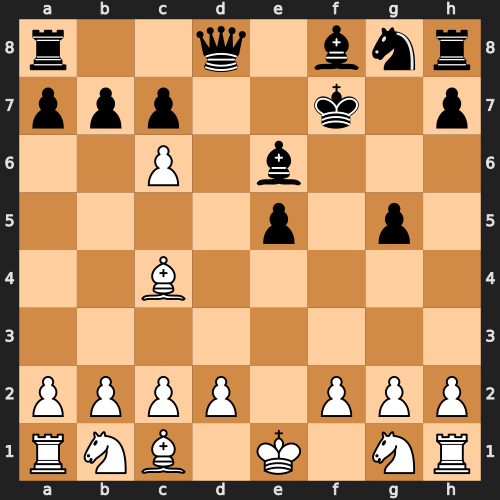

KeyboardInterrupt: Interrupted by user

In [7]:
from IPython.display import SVG, display, clear_output
import chess

PLAY_WHITE = True

engine = cb.engine.Engine(not PLAY_WHITE)
player_turn = not engine.play_white

while not engine.board.is_game_over():
    display(SVG(chess.svg.board(engine.board, orientation=not engine.play_white, size=500)))

    if player_turn:
        move = chess.Move.from_uci(input("Enter a move: "))
    else:
        print("Computer calculating...")
        move = engine.calculate_move()

    clear_output(wait=False)

    if not engine.board.is_legal(move):
        continue

    player_turn = not player_turn
    engine.board.push(move)

display(SVG(chess.svg.board(engine.board, orientation=not engine.play_white, size=500)))
engine.board.outcome()

## Sandbox

In [12]:
board = chess.Board()
board.turn

True

In [ ]:
train, val = cb.dataset.deepchess_dataset()

In [ ]:
deepchess = cb.model.get_deepchess()
deepchess.evaluate(train)

In [ ]:
deepchess.metrics

In [ ]:
# [1.2469837665557861, 0.6108400225639343]